# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [132]:
import pandas as pd
import numpy as np
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [133]:
len(data['user_id'].unique())

943

In [134]:
len(data['item_id'].unique())

1662

<font color='red'>Create your adjacency matrix </font>

In [135]:
data_without_rating = data.drop(['rating'],axis=1)
data_without_rating.head()

,user_id,item_id
0,772,36
1,471,228
2,641,401
3,312,98
4,58,504


In [136]:
from scipy.sparse import csr_matrix

# csr_matrix((data, (row, col)), shape=(3, 3)).toarray()
# in our case data is ratings and rows are user_ids and columns are item id's
adjacency_matrix = csr_matrix((data['rating'].values,(data['user_id'].values,data['item_id'].values)))

In [137]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [138]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [139]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [140]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

# here n_components is no.of columns to discard
# in our case it is k

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components = 5, n_iter=5, random_state=5)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)


(943, 5)
(5,)
(1681, 5)


In [169]:
adjacency_matrix.toarray()

array([[5, 0, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

<font color='red'>Compute mean of ratings</font>

In [141]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return np.mean(ratings)

In [142]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [143]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [144]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return [0 for i in range(dim)]

In [145]:
# here we have 943 unique users so dim = 943
dim= U.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)


In [146]:
# here we have 1681 unique movie id's so dim = 1681

dim= VT.T.shape[0]# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [147]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [148]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    
    dot = (np.dot(U[user_id].T,V.T[item_id]))

    loss = -2 * (rating-mu-b_i[user_id]-c_j[item_id]-dot)
  
    reg = 2 * alpha * b_i[user_id]
    
    
    return loss+reg


<font color='cyan'>Grader function -4 </font>

In [149]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [150]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    
    loss = -2 * (rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id].T,V.T[item_id]))
    reg = 2 * alpha * c_j[item_id]

    
    return loss+reg


<font color='cyan'>Grader function - 5 </font>

In [151]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [152]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

'Performing SGD'

alpha = 0.01
learning_rate = 0.01
epochs = [i for i in range(50)]
mse = []

for epoch in epochs:
    y_hat = []
    for each_user, each_item, rating in zip(data['user_id'].values,data['item_id'].values,data['rating'].values):
        updated_b_i = derivative_db(each_user,each_item,rating,U,VT,mu, alpha)
        updated_c_j = derivative_db(each_user,each_item,rating,U,VT,mu, alpha)
        b_i[each_user] = b_i[each_user] - (learning_rate * updated_b_i)
        c_j[each_item] = c_j[each_item] - (learning_rate * updated_c_j)
        
        y_pred = mu + b_i[each_user] + c_j[each_item] + np.dot(U[each_user],VT.T[each_item])
        y_hat.append(y_pred)
        
    mse.append(mean_squared_error(data['rating'].values,y_hat))
    print("Mean Squared Error for epoch "+str(epoch)+" ==> ",end = " ")
    print(mean_squared_error(data['rating'].values,y_hat))
        
        
        

Mean Squared Error for epoch 0 ==>  0.9063569968151424
Mean Squared Error for epoch 1 ==>  0.8234310676205163
Mean Squared Error for epoch 2 ==>  0.8083246080125359
Mean Squared Error for epoch 3 ==>  0.8020968471219667
Mean Squared Error for epoch 4 ==>  0.7989006858343912
Mean Squared Error for epoch 5 ==>  0.7970240885689697
Mean Squared Error for epoch 6 ==>  0.7958111537818631
Mean Squared Error for epoch 7 ==>  0.7949683299772815
Mean Squared Error for epoch 8 ==>  0.7943492239879101
Mean Squared Error for epoch 9 ==>  0.7938744953590339
Mean Squared Error for epoch 10 ==>  0.7934981108251233
Mean Squared Error for epoch 11 ==>  0.7931917722649673
Mean Squared Error for epoch 12 ==>  0.7929371965077296
Mean Squared Error for epoch 13 ==>  0.7927220528218827
Mean Squared Error for epoch 14 ==>  0.7925377120938283
Mean Squared Error for epoch 15 ==>  0.7923779414372568
Mean Squared Error for epoch 16 ==>  0.792238115341002
Mean Squared Error for epoch 17 ==>  0.7921147209075634
Mea

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

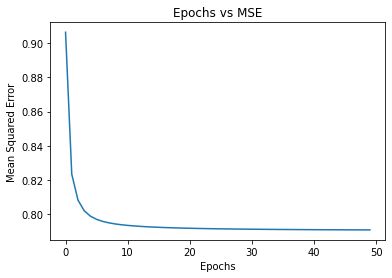

In [153]:
import matplotlib.pyplot as plt

plt.title("Epochs vs MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.plot(l,mse)
plt.show()

<br>

# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

In [154]:
data_user = pd.read_csv('user_info.csv')
data_user.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [155]:
print(y.shape,X.shape)

(943,) (943, 3)


In [156]:
from sklearn.model_selection import train_test_split

y = data_user['is_male']
X = data_user.drop(['is_male'],axis=1)

X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=0)

print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))

((707, 3), (707,))
((236, 3), (236,))


In [157]:
from sklearn.model_selection import RandomizedSearchCV

clf = SGDClassifier(eta0=0.0001,loss='log', random_state=15, penalty='l2', tol=1e-3,  learning_rate='constant')

param_dist = {
    'alpha':[0.001, 0.01, 0.1],
}

random_search_cv = RandomizedSearchCV(clf,param_dist,cv=10,scoring='roc_auc',n_jobs=-1)

random_search_cv.fit(X_train,y_train)


/Users/manikata/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/manikata/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=SGDClassifier(eta0=0.0001,
                                           learning_rate='constant', loss='log',
                                           random_state=15),
                   n_jobs=-1, param_distributions={'alpha': [0.001, 0.01, 0.1]},
                   scoring='roc_auc')

In [158]:
results_df = pd.DataFrame(random_search_cv.cv_results_)
results_df = results_df.sort_values(['param_alpha'])
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005304,0.002042,0.002827,0.001729,0.001,{'alpha': 0.001},0.520952,0.464762,0.507619,0.432381,0.527619,0.324762,0.573333,0.517979,0.420,0.519,0.480841,0.068245,3
1,0.004412,0.001570,0.003652,0.001871,0.01,{'alpha': 0.01},0.520952,0.531429,0.459048,0.422857,0.531429,0.324762,0.574286,0.519922,0.420,0.521,0.482568,0.071041,1
2,0.003846,0.001647,0.002319,0.001252,0.1,{'alpha': 0.1},0.520952,0.464762,0.507619,0.430476,0.533333,0.324762,0.571429,0.517979,0.418,0.521,0.481031,0.068836,2


In [159]:
# take from LR reference

def batch_predict(clf,data):
    y_data_pred = []
    tr_loop = data.shape[0]- (data.shape[0]%1000) # we have 73196 samples ==> 73196/1000 ==> 73000, each batch size is 1000
    # we are taking 1000 values at a time so, will have 73 batches, as each batch size = 1000
    for i in range(0,tr_loop,1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1]) # for auc score we only consider postive class values so[:,1]
    if data.shape[0]%1000 !=0:
        # data[tr_loop] means we are taking rest of the points into consideration in our case 196 points
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))] # np.argmax gives us the max index of (tpr*(1-fpr)) 
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# here using best threshold value finding y-predict values
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [160]:
from sklearn.linear_model import SGDClassifier

'applying logistic regression'

clf = SGDClassifier(eta0=0.0001, alpha=random_search_cv.best_params_['alpha'], loss='log', random_state=15, penalty='l2', tol=1e-3,  learning_rate='constant')
clf.fit(X_train,y_train)

# getting probabilites of train and test dataset
# to draw ROC_AUC curve we need the positve classes probabilities
y_train_pred = batch_predict(clf,X_train)
y_test_pred = batch_predict(clf,X_test)

/Users/manikata/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [161]:
from sklearn.metrics import roc_curve,auc
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

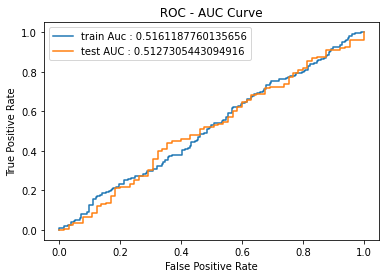

In [162]:
plt.plot(train_fpr,train_tpr,label="train Auc : "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="test AUC : "+str(auc(test_fpr,test_tpr)))
plt.title(" ROC - AUC Curve ")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [163]:
from sklearn.metrics import confusion_matrix
from pretty_confusion_matrix import pp_matrix

# getting best threshold value
best_t = find_best_threshold(train_thresholds, train_fpr, train_tpr)
print("\nTrain confusion matrix\n")
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
print(cm_train)
print("\nTest confusion matrix\n")
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(cm_test)

the maximum value of tpr*(1-fpr) 0.2670726067519655 for threshold 0.0

Train confusion matrix

[[ 90 118]
 [191 308]]

Test confusion matrix

[[29 36]
 [76 95]]


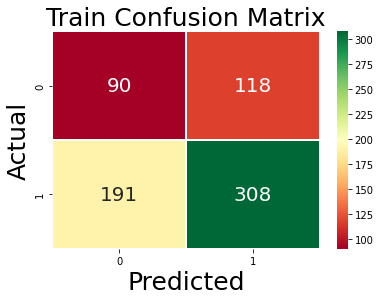

In [164]:
import seaborn as sns

df_train_cm = pd.DataFrame(cm_train,
                   columns = [0,1], index = [0,1])

ax1 = sns.heatmap(df_train_cm, cmap ='RdYlGn', linewidths = 0.30, fmt="",annot = True,annot_kws={'fontsize':20})
ax1.set_xlabel('Predicted',fontsize=25)
ax1.set_ylabel('Actual',fontsize=25)
ax1.set_title('Train Confusion Matrix',fontsize=25)
plt.show()

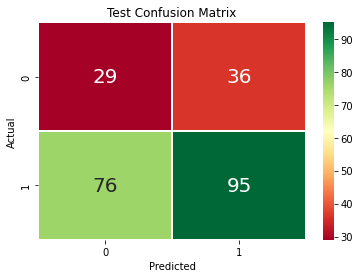

In [165]:
df_test_cm = pd.DataFrame(cm_test,columns=[0,1],index=[0,1])

ax2 = sns.heatmap(df_test_cm,cmap='RdYlGn',linewidths=0.30,fmt="" ,annot = True,annot_kws={'fontsize':20})
ax2.set(xlabel='Predicted',ylabel='Actual')
ax2.set_title('Test Confusion Matrix')
plt.show()

Observation

- By applying LogisticRegression, model is alomost performing like a random model by seeing test_AUC score = 0.512